In [24]:
import numpy as np
import pandas as pd

import fiona
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import Point

from pprint import pprint

# census

## import census data

In [29]:
sc_df = pd.read_csv("data/acs2017_tract.csv", index_col = 0)
sc_df.columns = sc_df.columns.str.lower().str.replace(" ", "_").str.replace("!!", "_").str.replace("estimate_", "")
sc_df.head()

,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,tract
0,1400000US06001400100,2991,2033,11,46,653,248,"Census Tract 4001, Alameda County, California",6,1,400100
1,1400000US06001400200,1997,1668,11,38,158,122,"Census Tract 4002, Alameda County, California",6,1,400200
2,1400000US06001400300,5123,4241,13,78,539,252,"Census Tract 4003, Alameda County, California",6,1,400300
3,1400000US06001400400,3991,3336,0,79,301,275,"Census Tract 4004, Alameda County, California",6,1,400400
4,1400000US06001400500,3944,3258,0,111,228,347,"Census Tract 4005, Alameda County, California",6,1,400500


In [3]:
sc_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Data columns (total 11 columns):
geography                                                      8057 non-null object
total                                                          8057 non-null int64
total_u.s._citizen_born_in_the_united_states                   8057 non-null int64
total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas    8057 non-null int64
total_u.s._citizen_born_abroad_of_american_parent(s)           8057 non-null int64
total_u.s._citizen_by_naturalization                           8057 non-null int64
total_not_a_u.s._citizen                                       8057 non-null int64
name                                                           8057 non-null object
state                                                          8057 non-null int64
county                                                         8057 non-null int64
tract                                                        

In [4]:
sc_df.describe(include = "all")

,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,tract
count,8057,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057,8057.0,8057.000000,8057.000000
unique,8057,NaN,NaN,NaN,NaN,NaN,NaN,8057,NaN,NaN,NaN
top,1400000US06037670001,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 1835.10, Los Angeles County, Cali...",NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
mean,NaN,4838.382400,3468.372719,9.726201,54.774234,653.826983,651.682264,NaN,6.0,54.690952,206459.268835
std,NaN,2193.716861,1734.244182,21.446800,51.963553,515.483973,577.209004,NaN,0.0,26.609992,244449.552415
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,6.0,1.000000,100.000000
25%,NaN,3458.000000,2349.000000,0.000000,20.000000,305.000000,223.000000,NaN,6.0,37.000000,9117.000000
50%,NaN,4586.000000,3199.000000,0.000000,42.000000,531.000000,484.000000,NaN,6.0,59.000000,86801.000000
75%,NaN,5888.000000,4293.000000,12.000000,75.000000,858.000000,923.000000,NaN,6.0,73.000000,406700.000000


## create features

In [5]:
sc_df["porp_of_non_citizen"] = sc_df["total_not_a_u.s._citizen"] / sc_df["total"]
sc_df.sort_values("porp_of_non_citizen", ascending=False).head()

,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,tract,porp_of_non_citizen
1740,1400000US06037209402,3808,1204,0,0,196,2408,"Census Tract 2094.02, Los Angeles County, Cali...",6,37,209402,0.632353
7088,1400000US06085505008,5857,1800,0,76,443,3538,"Census Tract 5050.08, Santa Clara County, Cali...",6,85,505008,0.604064
1731,1400000US06037208902,2885,986,0,0,164,1735,"Census Tract 2089.02, Los Angeles County, Cali...",6,37,208902,0.601386
1732,1400000US06037208903,4278,1766,0,0,157,2355,"Census Tract 2089.03, Los Angeles County, Cali...",6,37,208903,0.550491
1719,1400000US06037208301,2130,762,0,0,200,1168,"Census Tract 2083.01, Los Angeles County, Cali...",6,37,208301,0.548357


In [6]:
sc_df.shape

(8057, 12)

In [7]:
sc_df.dropna(subset=["porp_of_non_citizen"], inplace=True)

In [8]:
sc_df.shape

(8012, 12)

## import tract shp data

In [9]:
tract_geodf = gpd.read_file("data/cb_2017_06_tract_500k/cb_2017_06_tract_500k.shp")
tract_geodf.columns = tract_geodf.columns.str.lower()

In [11]:
mtc_crs = {'init': 'epsg:4326'}
tract_geodf = tract_geodf.to_crs(mtc_crs)
tract_geodf.head()

,statefp,countyfp,tractce,affgeoid,geoid,name,lsad,aland,awater,geometry
0,06,001,400600,1400000US06001400600,06001400600,4006,CT,297856,0,"POLYGON ((-122.26807 37.844136, -122.26514 37...."
1,06,001,400900,1400000US06001400900,06001400900,4009,CT,420877,0,"POLYGON ((-122.285576 37.839778, -122.283186 3..."
2,06,001,401400,1400000US06001401400,06001401400,4014,CT,758204,0,"POLYGON ((-122.278611 37.826878, -122.268563 3..."
3,06,001,403000,1400000US06001403000,06001403000,4030,CT,352394,0,"POLYGON ((-122.274757 37.79883299999999, -122...."
4,06,001,405902,1400000US06001405902,06001405902,4059.02,CT,487280,0,"POLYGON ((-122.247175 37.789913, -122.243512 3..."


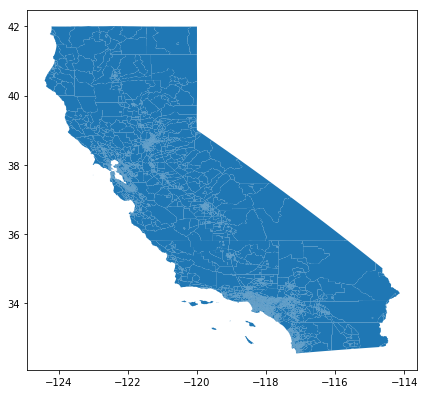

In [14]:
tract_geodf.plot(figsize=(7,7))

## merge data

In [13]:
merge_geodf = pd.merge(tract_geodf, sc_df, left_on="affgeoid", right_on="geography")
merge_geodf.head()

,statefp,countyfp,tractce,affgeoid,geoid,name_x,lsad,aland,awater,geometry,...,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name_y,state,county,tract,porp_of_non_citizen
0,06,001,400600,1400000US06001400600,06001400600,4006,CT,297856,0,"POLYGON ((-122.26807 37.844136, -122.26514 37....",...,1373,0,28,153,81,"Census Tract 4006, Alameda County, California",6,1,400600,0.049541
1,06,001,400900,1400000US06001400900,06001400900,4009,CT,420877,0,"POLYGON ((-122.285576 37.839778, -122.283186 3...",...,2003,0,34,182,175,"Census Tract 4009, Alameda County, California",6,1,400900,0.073099
2,06,001,401400,1400000US06001401400,06001401400,4014,CT,758204,0,"POLYGON ((-122.278611 37.826878, -122.268563 3...",...,3008,0,38,282,685,"Census Tract 4014, Alameda County, California",6,1,401400,0.170695
3,06,001,403000,1400000US06001403000,06001403000,4030,CT,352394,0,"POLYGON ((-122.274757 37.79883299999999, -122....",...,818,10,18,1425,980,"Census Tract 4030, Alameda County, California",6,1,403000,0.301446
4,06,001,405902,1400000US06001405902,06001405902,4059.02,CT,487280,0,"POLYGON ((-122.247175 37.789913, -122.243512 3...",...,1429,0,51,819,802,"Census Tract 4059.02, Alameda County, California",6,1,405902,0.258626


In [15]:
merge_geodf = gpd.GeoDataFrame(merge_geodf, geometry="geometry", crs=tract_geodf.crs)

## plot on map

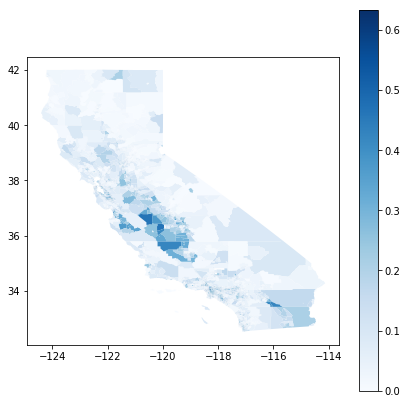

In [21]:
# static map

merge_geodf.plot(column="porp_of_non_citizen", cmap="Blues", legend=True, figsize=(7,7))

In [46]:
# interactive map

ca_coordinates = (37.16611, -119.44944)

ca_map = folium.Map(location=ca_coordinates, zoom_start=6)

folium.Choropleth(
    geo_data = merge_geodf.to_json(),
    data=merge_geodf,
    name="Percentage of non-US citizen in total population",
    columns=["tract", "porp_of_non_citizen"],
    key_on="feature.properties.tract",
    fill_color="Blues",
    legend_name="Percentage of non-US citizen in total population",
#    bins=bins
).add_to(ca_map)

folium.LayerControl(collapsed=False).add_to(ca_map)

ca_map.save("map/map_prop_of_non_citizen.html")

# CRLA office

## import crla office data

In [27]:
crla_office_df = pd.read_csv("data/crla_office_locations.csv", index_col=0)
crla_office_df.head()

,name,address,longitude,latitude
0,administrative office,"1430 franklin street, suite 103, oakland, ca 9...",-122.26919,37.804375
1,arvin,"211 bear mountain blvd., arvin, ca 93203",-118.82564,35.208841
2,coachella,"1460 6th street, p.o. box 35, coachella, ca 92236",-116.17685,33.678303
3,delano,"601 high street, suite c, delano, ca 93215",-119.24624,35.763884
4,el centro,"449 broadway st., el centro, ca 92243",-115.55365,32.793576


In [30]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(crla_office_df.longitude, crla_office_df.latitude)]
crla_office_geodf = gpd.GeoDataFrame(crla_office_df, crs=crs, geometry=geometry)
crla_office_geodf.head()

,name,address,longitude,latitude,geometry
0,administrative office,"1430 franklin street, suite 103, oakland, ca 9...",-122.26919,37.804375,POINT (-122.26919 37.804375)
1,arvin,"211 bear mountain blvd., arvin, ca 93203",-118.82564,35.208841,POINT (-118.82564 35.208841)
2,coachella,"1460 6th street, p.o. box 35, coachella, ca 92236",-116.17685,33.678303,POINT (-116.17685 33.678303)
3,delano,"601 high street, suite c, delano, ca 93215",-119.24624,35.763884,POINT (-119.24624 35.763884)
4,el centro,"449 broadway st., el centro, ca 92243",-115.55365,32.793576,POINT (-115.55365 32.793576)


## plot on map

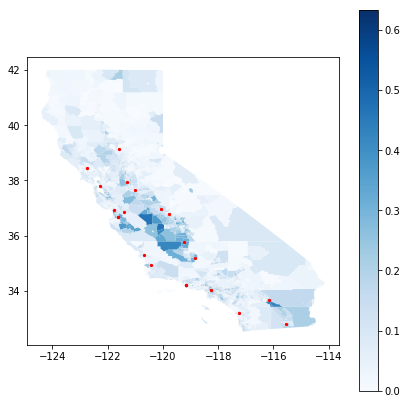

In [41]:
# static map

base = merge_geodf.plot(column="porp_of_non_citizen", cmap="Blues", legend=True, figsize=(7,7))
crla_office_geodf.plot(ax=base, color="r", markersize=5)

In [47]:
# interactive map

for idx, row in crla_office_df.iterrows():
  folium.Marker(location=[row["latitude"], row["longitude"]],
                popup=row["name"],
                icon=folium.Icon(color='red', icon='building', prefix="fa")).add_to(ca_map)

ca_map.save("map/map_prop_of_non_citizen.html")